In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = load_iris()

# Split the data into features (X) and target (y)
X = iris.data
y = iris.target

# Create a k-fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create an empty list to store the test scores
test_scores = []

# Loop over each fold
for train_index, test_index in kfold.split(X):
    # Split the data into training and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train a logistic regression model on the training data
    model = LogisticRegression(max_iter=1_000)
    model.fit(X_train, y_train)

    # Evaluate the model on the test data and store the score
    score = model.score(X_test, y_test)
    test_scores.append(score)

# Compute the average test score across all folds
avg_score = np.mean(test_scores)
print("Average test score:", avg_score)


Average test score: 0.9733333333333334


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

# Load the iris dataset
iris = load_iris()

# Define the input features and target variable
X = iris.data[:, :2]
y = iris.target

# Define the k-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a perceptron and logistic regression model
perceptron = Perceptron()
logistic = LogisticRegression(max_iter=1000)

# Use k-fold cross-validation to evaluate each model's performance
perceptron_scores = cross_val_score(perceptron, X, y, cv=kf)
logistic_scores = cross_val_score(logistic, X, y, cv=kf)

# Print the average test scores for each model
print("Perceptron average test score:", perceptron_scores.mean())
print("Logistic Regression average test score:", logistic_scores.mean())


Perceptron average test score: 0.5933333333333333
Logistic Regression average test score: 0.8200000000000001


Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.3519 - accuracy: 1.0000
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 1.0000
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 1.0000
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 1.0000
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 1.0000
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 1.0000
Epoch 11/100
8/8 [===========

Test accuracy: 1.0


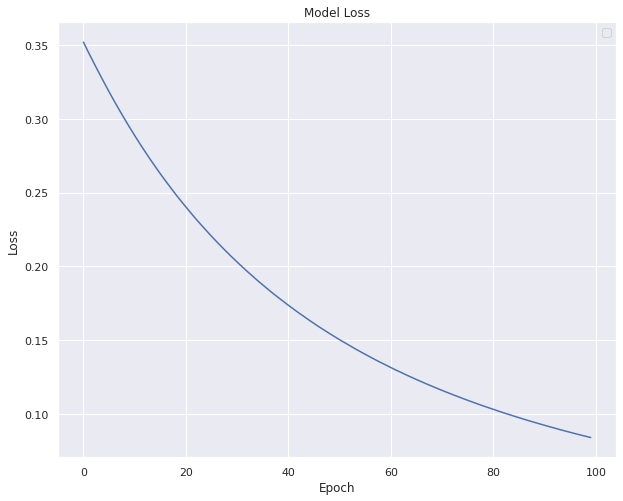

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

# set them 
sns.set_theme()

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only the samples from the first two classes
X = X[y < 2]
y = y[y < 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # input layer with 4 features
    tf.keras.layers.Dense(1, activation='sigmoid')  # single neuron with sigmoid activation function
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print('Test accuracy:', accuracy)

# Plot the loss curve
plt.figure(figsize = (10, 8))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch 1/50
313/313 [==============================] - 2s 4ms/step - loss: 0.4786 - accuracy: 0.7758 - val_loss: 0.4239 - val_accuracy: 0.8110
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.8189 - val_loss: 0.4243 - val_accuracy: 0.8185
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 0.4153 - accuracy: 0.8214 - val_loss: 0.4203 - val_accuracy: 0.8215
Epoch 4/50
313/313 [==============================] - 2s 5ms/step - loss: 0.4024 - accuracy: 0.8265 - val_loss: 0.4062 - val_accuracy: 0.8280
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 0.8304 - val_loss: 0.3959 - val_accuracy: 0.8295
Epoch 6/50
313/313 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8315 - val_loss: 0.4002 - val_accuracy: 0.8225
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 0.3889 - accuracy: 0.8342 - val_loss: 0.4323 - val_accuracy: 0.8190
Epoch 

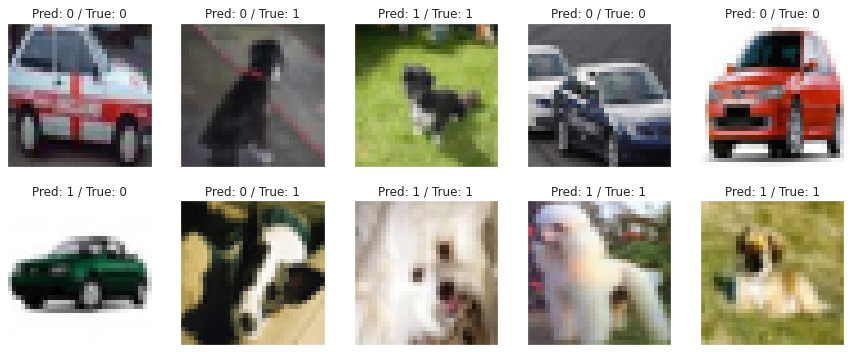

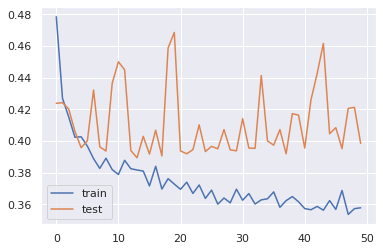

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Dictionary mapping labels to indices
label_dict = {
    "airplane": 0,
    "automobile": 1,
    "bird": 2,
    "cat": 3,
    "deer": 4,
    "dog": 5,
    "frog": 6,
    "horse": 7,
    "ship": 8,
    "truck": 9
}

# Select only the samples for cats and dogs (classes 3 and 5)
X_train = X_train[np.logical_or(y_train == 1, y_train == 5)[:, 0], :, :, :]
y_train = y_train[np.logical_or(y_train == 1, y_train == 5)]
X_test = X_test[np.logical_or(y_test == 1, y_test == 5)[:, 0], :, :, :]
y_test = y_test[np.logical_or(y_test == 1, y_test == 5)]

# Convert the labels to binary
y_train[y_train == 1] = 0
y_train[y_train == 5] = 1
y_test[y_test == 1] = 0
y_test[y_test == 5] = 1

# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),  # flatten the 32x32x3 input images
    tf.keras.layers.Dense(1, activation='sigmoid')  # single neuron with sigmoid activation function
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print('Test accuracy:', accuracy)

# Predict the labels for the test set
y_pred = model.predict(X_test)

def plot_images(X_test, y_test, y_pred):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        j = np.random.randint(200)
        ax.imshow(X_test[j], interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Pred: {} / True: {}".format(round(float(y_pred[j])), y_test[j]))
    plt.show()

# Show some example images with their predicted label
plot_images(X_test, y_test, y_pred)

# Plot the loss over time
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
np.shape(X_train)

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

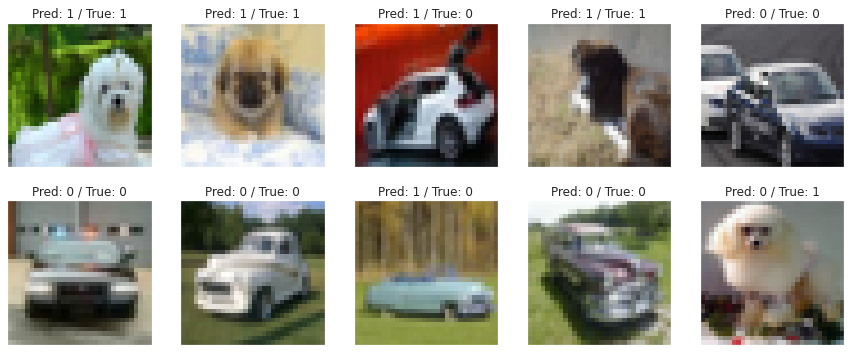

In [ ]:
plot_images(X_test, y_test, y_pred)

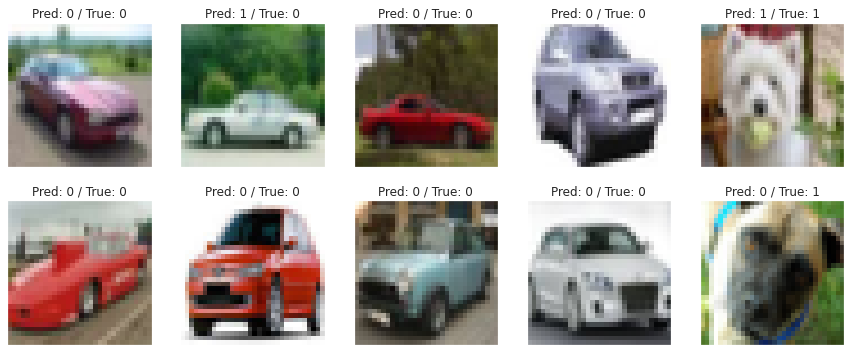

In [ ]:
plot_images(X_test, y_test, y_pred)

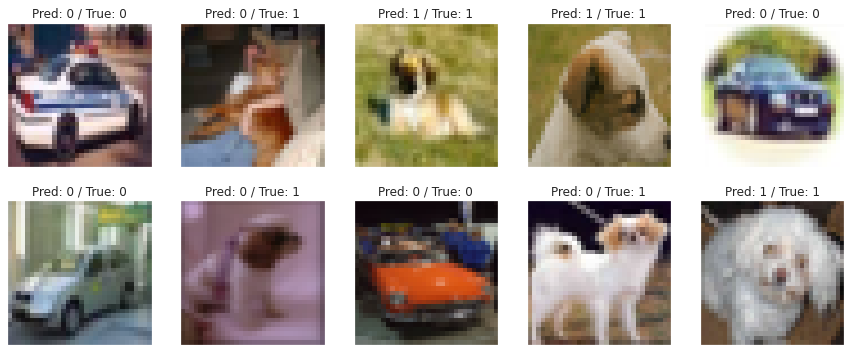

In [ ]:
plot_images(X_test, y_test, y_pred)

In [ ]:
import gym
import numpy as np
from IPython.display import clear_output
import time

env = gym.make('Taxi-v3')
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))

# Q-learning parameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1
num_episodes = 10000

# Q-learning algorithm
for i in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        next_state, reward, done, _ = env.step(action)
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
        state = next_state

# Visualize the trained agent
state = env.reset()
done = False
while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, _ = env.step(action)
    state = next_state
    clear_output(wait=True)
    env.s = state
    env.render(mode='ansi')
    time.sleep(0.5)

env.close()




/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [ ]:
%pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.6 MB/s eta 0:00:00
